In [1]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy.linalg as lin
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import statsmodels.api as sm

#### Data Load

In [2]:
data = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/inclass01.csv")

In [3]:
# data.head()
# log10Y (DV): (Log-)Price of real estate per acre ($)
# X1 (IV): County, {0 = San Mateo, 1 = Santa Clara}
# X2 (IV): Size of property (acre)
# X3 (IV): Elevation (altitude above sea level) (ft)
# X4 (IV): Sewer (distance to the nearest sewer facility)
# X5 (IV): Date of the past selling backward from current time (months)
# X6 (IV): Flood possibility by tidal action (0 = not, 1 = possible)
# X7 (IV): Distance to San Francisco (mile)

In [4]:
y= data['y']

In [5]:
dv = np.log(y)
# dv.head()

In [6]:
data['dv'] = dv

In [7]:
#data.head()

### Problem 1.

##### A. Using all IVs, find the regression model parameters, b0 ~ b7, using the least squares

In [8]:
m1_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
m1_x_var = data[m1_features]
m1_y_var = data['dv']

m1 = linear_model.LinearRegression()
m1.fit(m1_x_var, m1_y_var)

print('Intercept: \n',m1.intercept_)
print('Coefficients: \n',m1.coef_)

Intercept: 
 3.098580168929617
Coefficients: 
 [-1.59625202e-01 -2.57777324e-04  5.05297926e-02 -8.33800503e-05
  1.47884591e-02 -9.81901036e-01  4.88877898e-02]


##### B. Instead of using all IV’s, select a subset of them. Using the subset, build a regression model and find the parameters. Make your own criterion for selecting IV’s. 

In [9]:
# I will use Backward elimination model for feature selection
# Based On A, We will start model 1 which has all IVs in the model.
# And then, I will romove sequentially based on T-test if IV is not insignificant
# Based on Below chart, x1 is insignificant with 95% CI, So I can remove it

model1 = smf.ols(formula = 'dv ~ x1 + x2 + x3 + x4 + x5 + x6 + x7', data = data)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     17.46
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           8.11e-08
Time:                        22:21:12   Log-Likelihood:                -4.5968
No. Observations:                  31   AIC:                             25.19
Df Residuals:                      23   BIC:                             36.67
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0986      0.282     11.006      0.000       2.516       3.681
x1            -0.1596      0.269     -0.594      0.558      -0.715       0.396
x2            -0.0003      0.000     -1.002      0.327      -0.001       0.000
x3             0.0505      0.018      2.880      0.008       0.014       0.087
x4         -8.338e-05   3.07e-05     -2.720      0.012      -0.000      -2e-05
x5             0.0148      0.004      4.135      0.000       0.007       0.022
x6            -0.9819      0.220     -4.468      0.000      -1.437      -0.527
x7             0.0489      0.025      1.958      0.062      -0.003       0.101
==============================================================================
Omnibus:                        2.195   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.655
Skew:                           0.385   Prob(JB):                        0.437
Kurtosis:                       2.170   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Based on below graph, x2 is insignificant with 95% CI, So I can remove X2 in the model.

model_x2_x7 = smf.ols(formula = 'dv ~ x2 + x3 + x4 + x5 + x6 + x7', data = data)
result = model_x2_x7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     20.87
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.98e-08
Time:                        22:21:39   Log-Likelihood:                -4.8331
No. Observations:                  31   AIC:                             23.67
Df Residuals:                      24   BIC:                             33.70
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0057      0.231     13.009      0.000       2.529       3.483
x2            -0.0002      0.000     -0.909      0.372      -0.001       0.000
x3             0.0499      0.017      2.890      0.008       0.014       0.086
x4         -7.653e-05    2.8e-05     -2.731      0.012      -0.000   -1.87e-05
x5             0.0161      0.003      5.914      0.000       0.011       0.022
x6            -0.9154      0.187     -4.906      0.000      -1.300      -0.530
x7             0.0583      0.019      3.053      0.005       0.019       0.098
==============================================================================
Omnibus:                        2.077   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.884
Skew:                           0.552   Prob(JB):                        0.390
Kurtosis:                       2.512   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# In this, All IVs are signigicant with 95 % CI.
# And, In case of X4, there is too small coeficient with DV, So I removed it.
# So, I can use X3, X5, X6, and X7 as IVs in the model.

model_x3_x7 = smf.ols(formula = 'dv ~ x3 + x4 + x5 + x6 + x7', data = data)
result = model_x3_x7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     25.05
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           5.47e-09
Time:                        22:23:48   Log-Likelihood:                -5.3577
No. Observations:                  31   AIC:                             22.72
Df Residuals:                      25   BIC:                             31.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0887      0.212     14.603      0.000       2.653       3.524
x3             0.0505      0.017      2.934      0.007       0.015       0.086
x4         -7.859e-05   2.78e-05     -2.824      0.009      -0.000   -2.13e-05
x5             0.0172      0.002      7.080      0.000       0.012       0.022
x6            -0.8835      0.183     -4.838      0.000      -1.260      -0.507
x7             0.0478      0.015      3.147      0.004       0.017       0.079
==============================================================================
Omnibus:                        2.229   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.889
Skew:                           0.587   Prob(JB):                        0.389
Kurtosis:                       2.709   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model2 = smf.ols(formula = 'dv ~ x3 + x5 + x6 + x7', data = data)
result = model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     23.12
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.05e-08
Time:                        22:23:51   Log-Likelihood:                -9.6483
No. Observations:                  31   AIC:                             29.30
Df Residuals:                      26   BIC:                             36.47
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8244      0.214     13.223      0.000       2.385       3.263
x3             0.0746      0.017      4.435      0.000       0.040       0.109
x5             0.0186      0.003      6.902      0.000       0.013       0.024
x6            -0.7789      0.201     -3.868      0.001      -1.193      -0.365
x7             0.0591      0.017      3.575      0.001       0.025       0.093
==============================================================================
Omnibus:                       10.288   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.969
Skew:                           1.182   Prob(JB):                       0.0113
Kurtosis:                       4.163   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### C. Compare R2 between A and B. Also, compare adjusted R2 between A and B.

In [14]:
# As we can see A, R-sqared of model 1 is 0.842
# And Ajd R-sqared of model 1 is 0.793

# As we can see B, R-sqared of model 2 is 0.781
# And Ajd R-sqared of model 2 is 0.747

##### D. Compare the parameter values (bi) between A and B and interpret what the parameter values indicate in terms of the prediction of Y.

In [15]:
# X1 (IV): County, {0 = San Mateo, 1 = Santa Clara}
# X2 (IV): Size of property (acre)
# X3 (IV): Elevation (altitude above sea level) (ft)
# X4 (IV): Sewer (distance to the nearest sewer facility)
# X5 (IV): Date of the past selling backward from current time (months)
# X6 (IV): Flood possibility by tidal action (0 = not, 1 = possible)
# X7 (IV): Distance to San Francisco (mile)

# In case of A
# b0 = 3.0986, b1 = -0.1596, b2 = -0.0003, b3 = 0.0505, b4 = -0.00008338, b5 = 0.0148, b6 = -0.9819, b7 = 0.0489

# In case of B 
# b0 = 2.8244, b3 = 0.0746, b5 = 0.0186, b6 = -0.7789, b7 = 0.0591

# In model A, price could be predicted by combination of all variables. 
# in this, most affected variables is x6(flood possibility) which has negative correlations.
# x4 (sewer) has no effect on price to both model.
# In model B, price could be predicted by combination of x3(elevation), x5(date of past selling date), 
# x6(flood posibility) and x7(distance to san fransicso) 
# Based on this,Other variables could be fixed, x6 has a highly negative corr with dv (price)
# That is, If other variables are fixed and x6 is increased one unit, then price is decreased -0.9819 and -0.7789 in each model 1 and 2
# in similar way, if variavles has negative correlation with price, it meas that if other bariables could be fixed, that variables
# could negative effect on the price with ther coeficient.
# And if variables has positive correlation with price, it means that if other variables could be fixed, that variables 
# could positive effect on the price with their coeficient. 

### Problem 2.

###### A. Fill in an ANOVA table below. Test the null hypothesis that bi = 0 for all i. Set the significance level, a = 0.01. Report your p-value.

In [16]:
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

model2 = ols('dv ~ x3 + x5 + x6 + x7', data = data).fit()
aov_table = sm.stats.anova_lm(model2, type=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
x3,1.0,2.894696,2.894696,22.251258,7.091894e-05
x5,1.0,6.426115,6.426115,49.396955,1.833677e-07
x6,1.0,1.048022,1.048022,8.056047,8.682080e-03
x7,1.0,1.662726,1.662726,12.781219,1.400977e-03
Residual,26.0,3.382374,0.130091,NaN,NaN


F0.01,4,26 =  4.1399604836950115


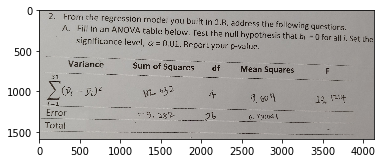

In [35]:
from scipy.stats import f
from scipy import stats

import scipy


from PIL import Image

im = Image.open('C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/ANOVA table.jpg')
im.show()
pix = np.array(image)
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(pix)

# F statistic = 23.121 
# ANOVA Table is attached in zip file, so it can be refered

from scipy.stats import f
import scipy.stats
print("F0.01,4,26 = ", scipy.stats.f.ppf(q=1-0.01, dfn=4, dfd=26))

# 23.121 > 4.14, So we can reject the null hypothesis which is all parameter of the model is equal to 0.

##### B. Perform the t-test on each parameter, bi. Report which parameters are significantly different from 0.

In [18]:
model2.summary()

# Based on below table, all p-value looks significant with CI 95 % and 99 %.
# So, We can say that all parameters in the model (x3,x4,x5,x6,x7) are significantly different from 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     23.12
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.05e-08
Time:                        20:23:51   Log-Likelihood:                -9.6483
No. Observations:                  31   AIC:                             29.30
Df Residuals:                      26   BIC:                             36.47
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8244      0.214     13.223      0.000       2.385       3.263
x3             0.0746      0.017      4.435      0.000       0.040       0.109
x5             0.0186      0.003      6.902      0.000       0.013       0.024
x6            -0.7789      0.201     -3.868      0.001      -1.193      -0.365
x7             0.0591      0.017      3.575      0.001       0.025       0.093
==============================================================================
Omnibus:                       10.288   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.969
Skew:                           1.182   Prob(JB):                       0.0113
Kurtosis:                       4.163   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 3.

##### A. Check the multicollinearity by calculating the condition index. What would you conclude?

In [39]:
x_var = ['x3', 'x5', 'x6', 'x7']
m = data[x_var]

x, v, d = np.linalg.svd(m)
print(v)
# max singular value is 354.88574249
# smallest singular value is 1.79966292

CI = 354.88574249/1.79966292

print("CI = ", CI)

# Based on above summary table, condition index is 197.2
# Condition index is very larger than 30, So we can say that there is higher multicolinearity in the model.
# So, In this, We can reduce the dimension using PCA or Factor analysis to fix the multicolinearity in the model. 

[354.88574249  28.72854633  23.84222342   1.79966292]
CI =  197.19567400432965


##### B. Plot the error data. Check the autocorrelation of error using Durbin-Watson statistics. What would you conclude?

In [22]:
import statsmodels.stats.stattools

model_fitted_y = model2.fittedvalues
model_residuals = model2.resid

print('durbin-watson statistics = ',  statsmodels.stats.stattools.durbin_watson(model_residuals, axis=0))

# Durbin-Watson statistics is in above table.
# it is 2.376 and close to the 2. So, we can say that there is no autocorrelation in the error

durbin-watson statistics =  2.3762204017819073


Text(0, 0.5, 'Residuals')

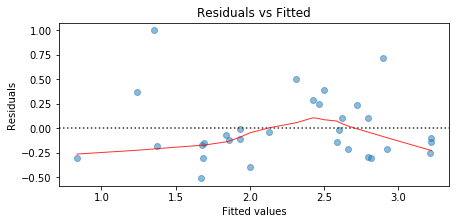

In [59]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(3)
plot_lm_1.set_figwidth(7)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'dv', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')